In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.95976306, -0.56298954, -1.43321351,  1.77384099,  1.24554781,
         0.32649112, -0.18859167,  0.53687196,  0.07979154, -0.28240434],
       [-0.59720301, -0.74983024, -1.31387021,  1.0993641 ,  1.25278712,
        -0.14627189, -0.61264106,  0.19272555,  1.25741777, -1.79352395]])

In [4]:
test_Features[:2]

array([[ 1.63488502,  0.16967219,  0.9257211 , -1.37809396, -1.35155173,
        -2.13886179,  1.69166125, -0.97207142, -0.94833042,  1.29585446],
       [-0.78626564, -0.73457316, -1.1003642 ,  1.72023293,  2.26628937,
         0.35047409, -0.38820234,  0.66973864,  1.34839604, -0.59873053]])

In [5]:
train_Label[:4]

array([1, 1, 0, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=20,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(10, activation='tanh'))

In [14]:
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 20)            40        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 20)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,061
Trainable params: 2,061
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [17]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 1s 77us/step - loss: 0.6182 - acc: 0.6780 - val_loss: 0.5370 - val_acc: 0.7450
Epoch 2/30
10194/10194 [==============================] - 0s 43us/step - loss: 0.5036 - acc: 0.7712 - val_loss: 0.4747 - val_acc: 0.7944
Epoch 3/30
10194/10194 [==============================] - 0s 23us/step - loss: 0.4524 - acc: 0.7999 - val_loss: 0.4392 - val_acc: 0.8082
Epoch 4/30
10194/10194 [==============================] - 0s 14us/step - loss: 0.4241 - acc: 0.8131 - val_loss: 0.4207 - val_acc: 0.8117
Epoch 5/30
10194/10194 [==============================] - 0s 14us/step - loss: 0.4078 - acc: 0.8195 - val_loss: 0.4082 - val_acc: 0.8180
Epoch 6/30
10194/10194 [==============================] - 0s 12us/step - loss: 0.3946 - acc: 0.8271 - val_loss: 0.3967 - val_acc: 0.8266
Epoch 7/30
10194/10194 [==============================] - 0s 11us/step - loss: 0.3838 - acc: 0.8365 - val_loss: 0.3870 - val_acc:

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

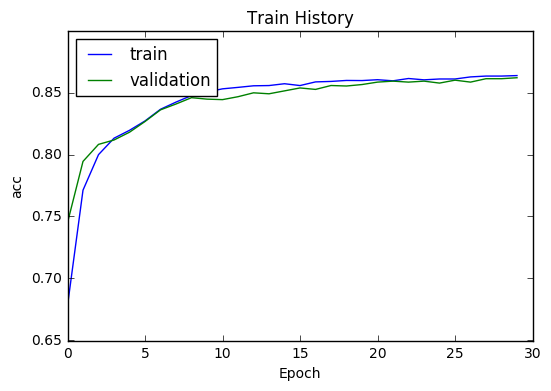

In [19]:
show_train_history(train_history,'acc','val_acc')

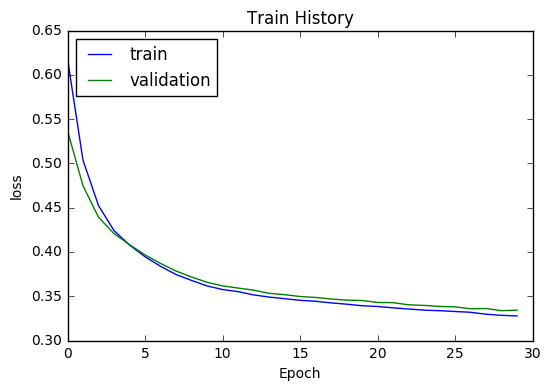

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 0s 21us/step


In [22]:
scores[1]

0.8500876214847227